# [Projeto da Disciplina - Ferramenta Computacional]

Aluno: Sebastião Oliveira Silva Neto - 2011478

# [Análise de Imagens de Câncer de Mama: Separação de Canais RGB, Pré-processamento e Análise de Câncer]

separação de imagem colorida entre os canais vermelho, verde e azul.

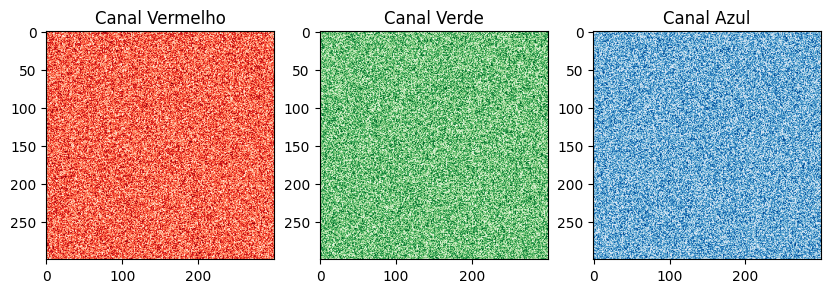

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Gerar uma imagem aleatória de 300x300 com três canais de cores (RGB)
imagem = np.random.randint(0, 255, (300, 300, 3), dtype=np.uint8)

# Separar a imagem nos canais Azul, Verde e Vermelho
canal_azul, canal_verde, canal_vermelho = cv2.split(imagem)

# Configurar o gráfico com 3 subplots para exibir cada canal
plt.figure(figsize=(10, 5))

# Exibir o canal Vermelho
plt.subplot(1, 3, 1)
plt.imshow(canal_vermelho, cmap='Reds')
plt.title('Canal Vermelho')

# Exibir o canal Verde
plt.subplot(1, 3, 2)
plt.imshow(canal_verde, cmap='Greens')
plt.title('Canal Verde')

# Exibir o canal Azul
plt.subplot(1, 3, 3)
plt.imshow(canal_azul, cmap='Blues')
plt.title('Canal Azul')

# Mostrar o gráfico com os três canais
plt.show()


## [ 2 -Pré-processamento de Imagens de Câncer de Mama e Análise]

pré-processamento de imagem de câncer de mama; e, análise de imagem de câncer de mama para inferir presença ou ausência de câncer de mama.

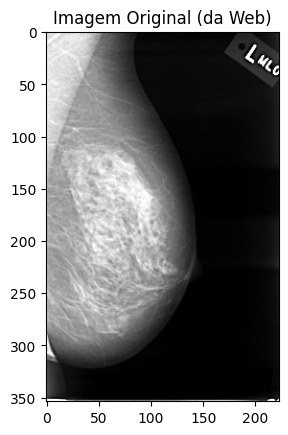

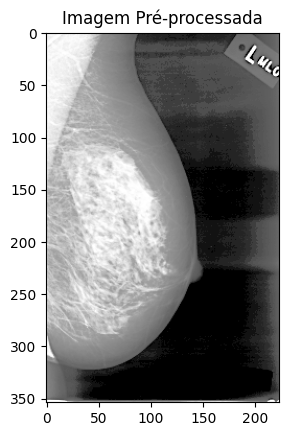

Porcentagem de pixels claros: 18.18%
Resultado da análise: Cancer detectado


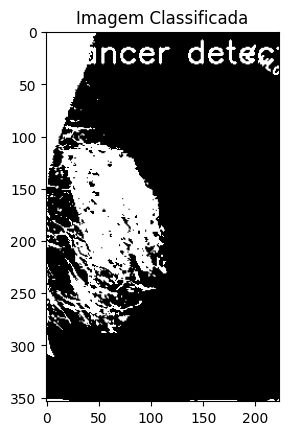

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# Fazer o download da imagem a partir de uma URL
url = "http://www.eng.usf.edu/cvprg/mammography/DDSM/thumbnails/cancers/cancer_01/case0001/C_0001_1.LEFT_MLO.LJPEG.1_highpass.gif"  # Altere para a URL desejada
resposta = requests.get(url)
imagem = Image.open(BytesIO(resposta.content))

# Converter a imagem para escala de cinza (grayscale)
imagem_cinza = np.array(imagem.convert('L'))

# Mostrar a imagem original
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem Original (da Web)')
plt.show()

# Aplicar equalização de histograma
imagem_equalizada = cv2.equalizeHist(imagem_cinza)

# Exibir a imagem após o pré-processamento
plt.imshow(imagem_equalizada, cmap='gray')
plt.title('Imagem Pré-processada')
plt.show()

# Aplicar um limite para detectar pixels "claros" (acima de um valor definido)
valor_limite = 200
_, imagem_binaria = cv2.threshold(imagem_equalizada, valor_limite, 255, cv2.THRESH_BINARY)

# Contar o número de pixels brancos
contagem_pixels_brancos = np.sum(imagem_binaria == 255)
total_de_pixels = imagem_cinza.size
percentual_branco = (contagem_pixels_brancos / total_de_pixels) * 100

# Inferir a presença de câncer com base no percentual de pixels brancos
if percentual_branco > 5:
    resultado = "Câncer detectado"
else:
    resultado = "Câncer ausente"

# Mostrar o resultado da análise
print(f"Porcentagem de pixels claros: {percentual_branco:.2f}%")
print(f"Resultado da análise: {resultado}")

# Adicionar o texto do resultado à imagem
cv2.putText(imagem_binaria, resultado, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
plt.imshow(imagem_binaria, cmap='gray')
plt.title('Imagem Classificada')
plt.show()
